In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

np.set_printoptions(suppress=True)

In [5]:
%matplotlib inline

In [6]:
from initializations import (
    initialize_agents,
    initialize_beacons
)

from influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from diagnostics import (
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence,
    inspect_alignment_influence,
    inspect_cohesion_influence
)

In [7]:
agent_pos, agent_rot = initialize_agents(num_agents=24)
beacon_pos = initialize_beacons(room_sensing_range=20., num_beacons=12)

agent_rot

array([[ 1.6966736 ],
       [ 1.0278357 ],
       [ 1.172364  ],
       [ 0.9876265 ],
       [ 0.59486365],
       [ 0.42344463],
       [ 1.3278961 ],
       [ 1.7686977 ],
       [ 0.63433516],
       [ 1.0842168 ],
       [ 2.3035514 ],
       [-3.1155717 ],
       [ 2.5374653 ],
       [ 2.9943616 ],
       [-1.6229199 ],
       [ 0.06522128],
       [-1.4113401 ],
       [ 0.7633776 ],
       [-0.87315625],
       [ 1.5986712 ],
       [ 0.274029  ],
       [-0.06002418],
       [-0.42080477],
       [ 1.5481656 ]], dtype=float32)

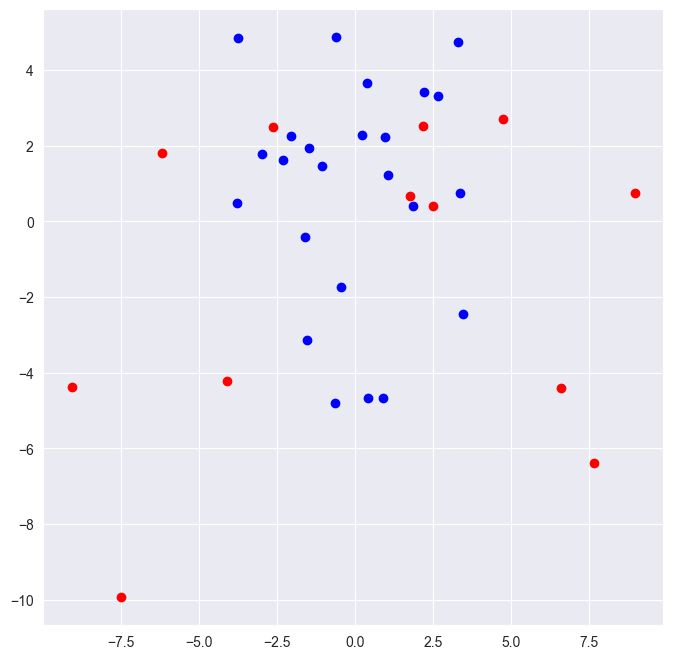

In [8]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(agent_pos[:,0], agent_pos[:,1], color='blue')
ax.scatter(beacon_pos[:,0], beacon_pos[:,1], color='red')

In [378]:
sim = motion_simulation(timesteps=300)

### Full simulation

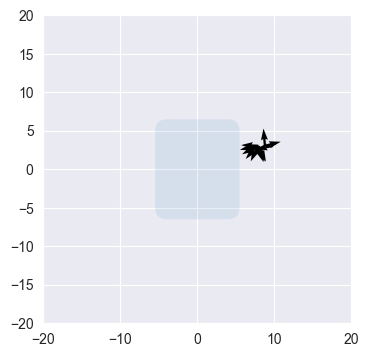

In [50]:
a = inspect_simulation(sim)
a.save('./../media/gif/animation.gif', writer=PillowWriter(fps=30))

### Rotation

Simulation of individual influences are unbounded in the test

In [379]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

1.206280719357604

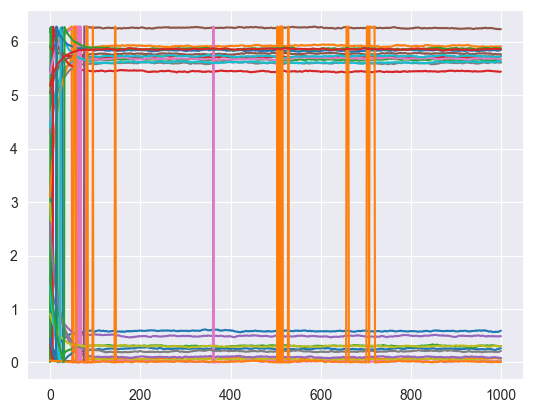

In [380]:
for i in range(len(agent_pos)):
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[-1], noise=0.2)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))

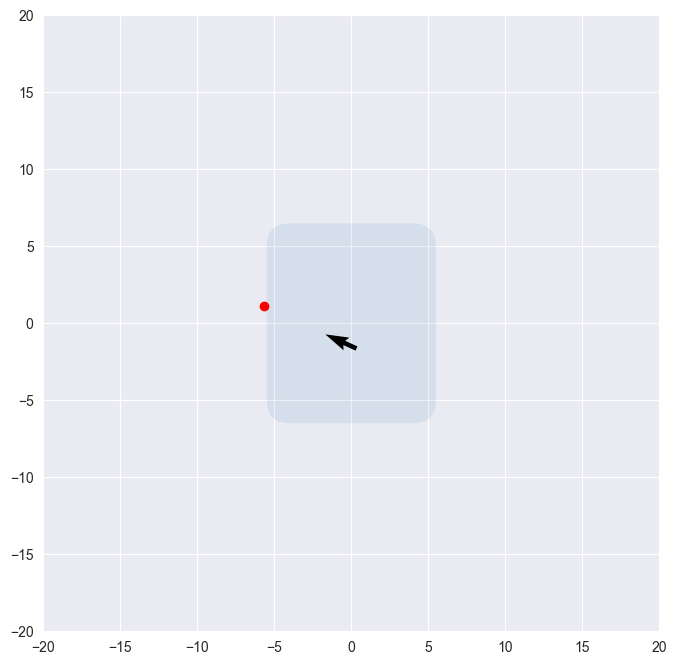

In [382]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../media/gif/rotation1.gif', writer=PillowWriter(fps=10))

### Position

In [383]:
p_influence = position_influence(agent_pos[-1], beacon_pos[-1], noise=0.1)

direction = np.arctan2(beacon_pos[-1, 1] - agent_pos[-1, 1], beacon_pos[-1, 0] - agent_pos[-1, 0])

print(p_influence, direction)

2.7007013519276977 2.715709


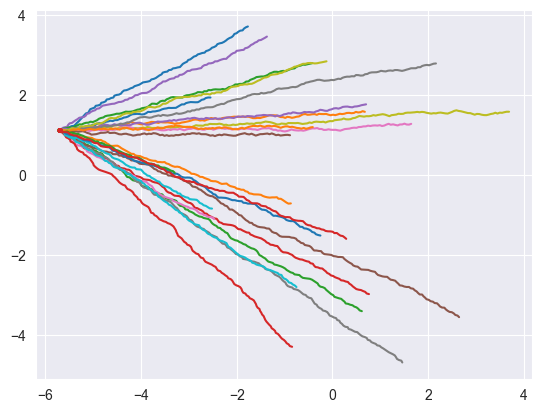

In [384]:
for i in range(len(agent_pos)):
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[-1], noise=1.)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])

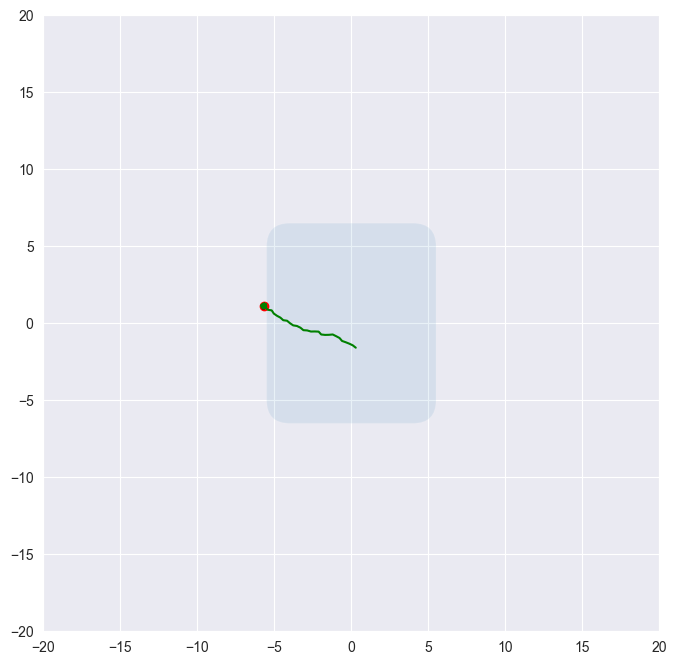

In [385]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], dt=0.5, timesteps=100, noise=1.)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=10))

### Alignment

In [386]:
al_influence = alignment_influence(agent_pos[2], agent_pos, agent_rot)
al_influence

0.48785878205609795

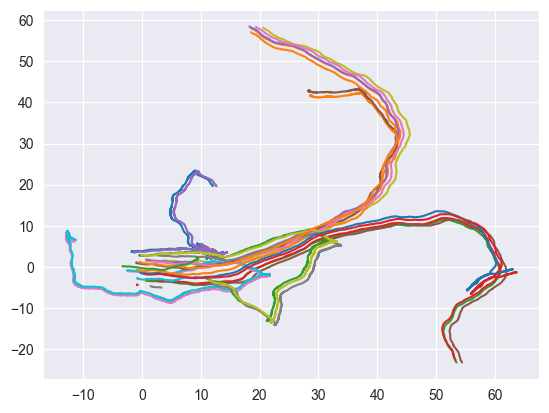

In [389]:
alignment_sim = look_with_neighbors(agent_pos, agent_rot, sensing_radius=1.5, noise=0.5)
for i in range(len(agent_pos)):
    plt.plot(alignment_sim[:,i,0], alignment_sim[:,i,1])

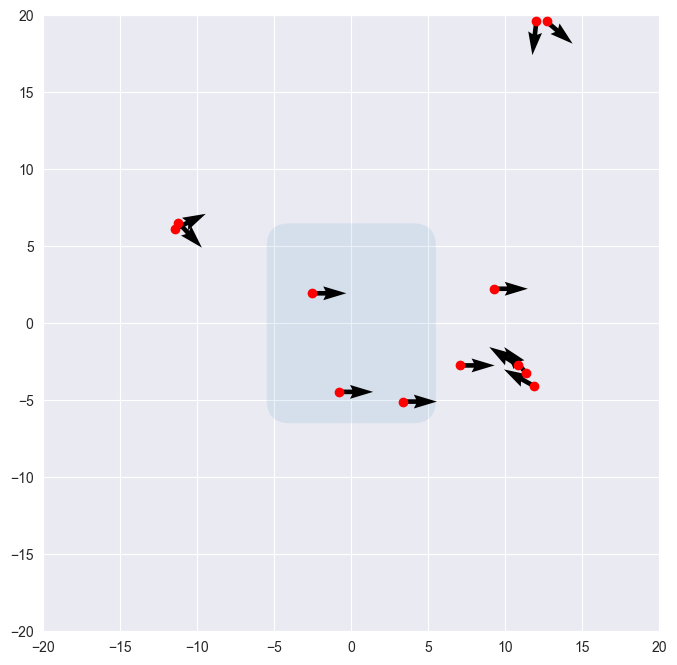

In [390]:
al = inspect_alignment_influence(alignment_sim)

al.save('./../media/gif/alignment1.gif', writer=PillowWriter(fps=10))

### Cohesion

In [391]:
co_influence = cohesion_influence(agent_pos[6], agent_pos, sensing_radius=1.5)
co_influence

2.119297981262207

[-2.4704313 -1.0926411]
[-0.4881926   0.56526109]
[-0.00782637  3.96379182]


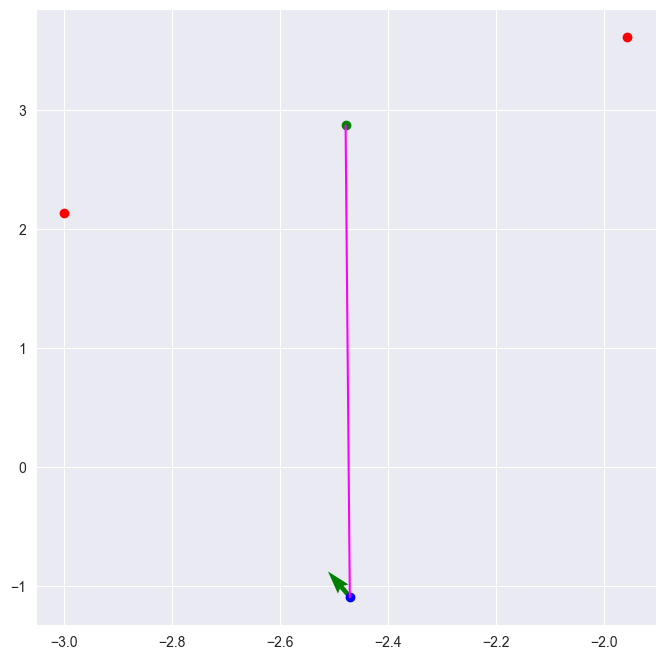

In [392]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

self = agent_pos[6]
print(self)
neighbors = np.array([[-1.9559693,  3.6110234], [-3.000546, 2.131278]])
average = np.array([-2.4782577, 2.8711507])
corrected = np.array([-0.4881926,  0.56526109])

twopoints = np.array([self, average])
print(corrected)
print(average - self)

ax.scatter(neighbors[:,0], neighbors[:,1], color='red')
ax.scatter(average[0], average[1], color='green')
ax.quiver(self[0], self[1], corrected[0], corrected[1], color='green')
ax.scatter(self[0], self[1], color='blue')
ax.plot(twopoints[:,0], twopoints[:,1], color='magenta')

In [414]:
cohesion_sim = move_with_neighbors(agent_pos, sensing_radius=0.8, noise=0.5)
cohesion_sim

array([[[-1.7667971 ,  3.7245321 ],
        [ 0.6762347 ,  1.5909111 ],
        [ 0.6134491 , -3.3943977 ],
        ...,
        [-0.41117454,  1.2084991 ],
        [-3.2954297 ,  0.06874502],
        [ 0.28724384, -1.5854456 ]],

       [[-1.7485993 ,  3.6779613 ],
        [ 0.65219635,  1.5470687 ],
        [ 0.5945514 , -3.3481066 ],
        ...,
        [-0.39483157,  1.1612455 ],
        [-3.2954297 ,  0.06874502],
        [ 0.29013425, -1.5355293 ]],

       [[-1.7284937 ,  3.632182  ],
        [ 0.6424296 ,  1.4980319 ],
        [ 0.5753564 , -3.3019378 ],
        ...,
        [-0.37151453,  1.1170152 ],
        [-3.2954297 ,  0.06874502],
        [ 0.2818707 , -1.4862169 ]],

       ...,

       [[-0.5813779 ,  1.2186736 ],
        [ 0.02599026, -0.00999239],
        [-0.01874815, -0.01699269],
        ...,
        [-0.0088444 , -0.02410392],
        [-3.2954297 ,  0.06874502],
        [-0.01419232, -0.0224796 ]],

       [[-0.5813779 ,  1.2186736 ],
        [-0.01742094,  0.01

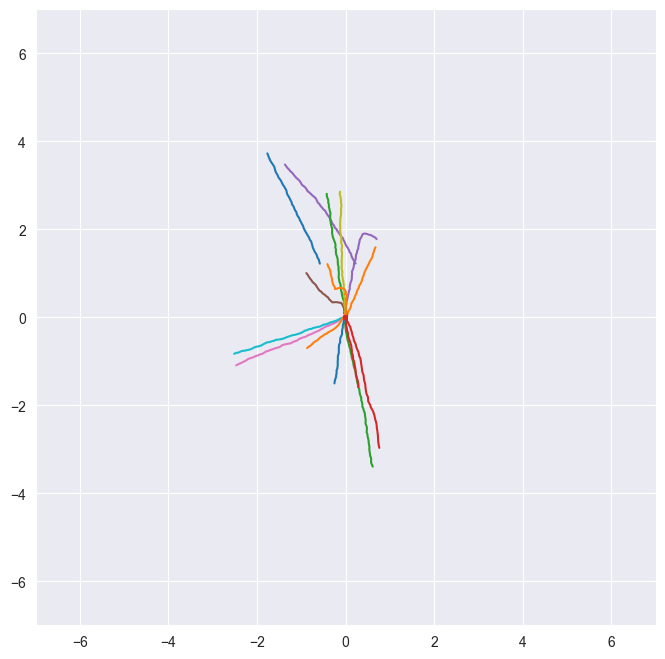

In [415]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(cohesion_sim[:,i,0], cohesion_sim[:,i,1])

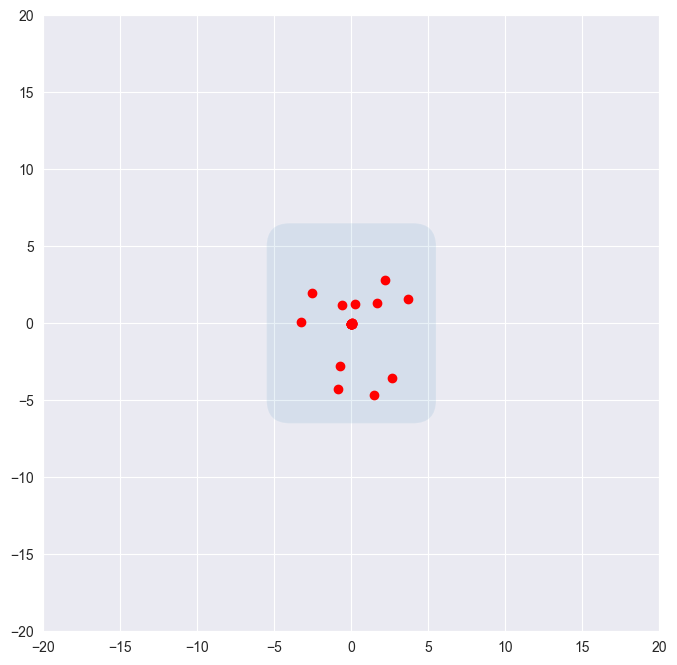

In [416]:
co = inspect_cohesion_influence(cohesion_sim)

co.save('./../media/gif/cohesion1.gif', writer=PillowWriter(fps=10))

### Combined influences

In [12]:
co_sim = collective_motion(
    agent_positions=agent_pos,
    agent_rotations=agent_rot,
    alignment_noise=0.5,
    cohesion_noise=0.5,
)

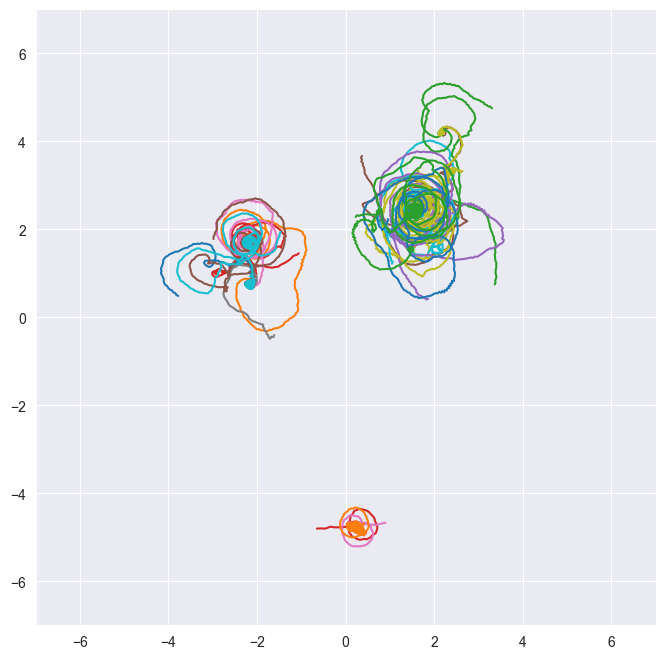

In [13]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(co_sim[:,i,0], co_sim[:,i,1])

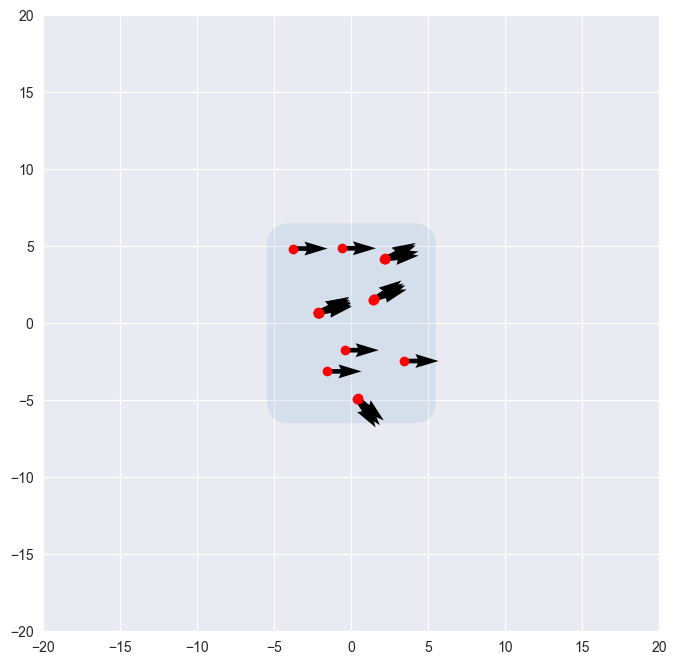

In [15]:
co_sim_vis = inspect_alignment_influence(co_sim)

co_sim_vis.save('./../media/gif/collective1.gif', writer=PillowWriter(fps=10))